# ICT 781 - Week 4

# Functions

Programming is inherently repetitive. One of the main goals of writing software is to get the computer to do tasks, often over and over again. A convenient way to complete these repetitive tasks is through defining functions. Through the use of functions, your Python programs will be composed of modules that you can use when needed. 

Here's a few examples of functions.

In [139]:
def hello():
    """ The 'Hello world' function. """
    c = 4
    print('Hello world')
    
hello()

Hello world


In [140]:
def makeEnthusiastic(word):
    """ Take in a string and add an exclamation point. """
    
    print(word + '!')
    
makeEnthusiastic('This past week was crazy')

This past week was crazy!


## Returning Values with Functions

Of course, we can do more than just manipulate strings with functions. We usually want our functions to actually have some output.

Let's start by defining a mathematical function that gives many people problems. The absolute value function $f(x) = |x|$ takes in a number $x$. If that number is positive, $f(x)$ gives you the number back. If the input $x$ is negative, then $f(x)$ makes it positive in its output. In mathematical terms,
$$
    f(x) = |x| = \begin{cases}
        x, \text{ if } x \geq 0,\\
        -x, \text{ if } x < 0.
    \end{cases}
$$
We can code this function in Python.

In [148]:
def absoluteValue(x):
    """ Absolute value function. """
    
    if x >= 0:
        return x
    elif x < 0:
        return -x

Functions in Python are defined with the `def` command. The function's name `absoluteValue` is highlighted in blue, and the argument we will pass the function is `x`. Function declarations end with the `:` symbol.

Within the function, we have the conditions of the absolute value function. We use the `return` command to produce the function's output.

Let's test this function. We know that $|5| = 5$ and that $|-11| = 11$, so let's see if our function gets it right.

In [147]:
for i in [5, -11]:
    print('The absolute value of {} is {}.'.format(i, absoluteValue(i)))
    
print('The absolute value of {} is {}.'.format(5, absoluteValue(5)))

The absolute value of 5 is 5.
The absolute value of -11 is 11.
The absolute value of 5 is 5.


In the above code, we called the function `absoluteValue` by typing the function name with an argument, for example `absoluteValue(5)`.

We can also call functions and declare variables based on the function output.

In [145]:
abs5 = absoluteValue(5)
print(abs5)

5


The `return` statement is very much like a `break` statement. It immediately exits the function and returns to the main body of the program, giving the `return` value as the function output. 

We can return more than just integers. Here's another example of a function that changes keywords in a sentence.

In [155]:
def scoobify(sentence, keywords = ('me','you','you,')):
    """ Replace the words 'me' and 'you' with 'Scooby' in a sentence. """
    
    scooby = 'Scooby'
    
    words = sentence.split(' ')
    
    # Split string will look like this: ['Will','you','not','take','me','with','you,','Mr.','Darcy?']
    
    changed_words = []
    
#     for w in words:
#         if w in keywords:
#             changed_words.append(scooby)
#         else:
#             changed_words.append(w)
    
    changed_words = [scooby if w in keywords else w for w in words]
    scoobed = ' '.join(changed_words)
    
    return scoobed

sentence = 'Will you not take me with you, Mr. Darcy?'
scoobed = scoobify(sentence)
print(scoobed)

Will Scooby not take Scooby with Scooby Mr. Darcy?


This function, while quite silly, introduces a few new concepts. First, the function takes in more than one argument. User-defined functions can take in as many arguments as you like. It should be obvious that you only want to pass in arguments that you actually want to use in your functions. 

Another new concept is the default argument for `keywords` given in the function declaration. You can specify an *immutable* as a default argument for your function. This helps in the event that no second argument is passed in to the function. You can see in the code above that I didn't specify a second argument in the function call in line 13, but the function did what it was supposed to do.

There are some cases where you will be working on a function and you want to call the function without returning a value. For this, you can use the `pass` keyword. This makes the function do everything it would do normally, but then exit with no output.

In [160]:
def workInProgress(x):
    """ Example of using pass instead of return. """
    
    fact = [x*(x-1) for x in range(0,-x,1)]
    total = sum(fact)
    
    print('This function is not done.')
    
    pass

workInProgress(60)

This function is not done.


## `main()` Functions

When you are building Python software, you will most likely be declaring multiple functions and controlling them with some code. Usually you'll want to place all of your code, functions included, inside a `main()` function. Here's an example of a few functions that calculate a customer's food bill at a restaurant.

In [161]:
def GST(amount, rate = 0.05):
    """ Calculate GST to add to bill. """
    if amount < 0:
        raise ValueError('{} should be non-negative.'.format(amount))
        
    return amount*(1 + rate)

def tip(amount, tip_percent = 0.15):
    """ Calculate the amount with a tip added. """
    
    if amount < 0:
        raise ValueError('{} should be non-negative.'.format(amount))
        
    return amount*(1 + tip_percent)

# Should these really be one function?

We'll put these functions inside a `main()` function and calculate the total bill for a restaurant purchase.

In [168]:
def main():
    """ Restaurant Bill Calculator. """
    
    print('Thank you for eating at the Python Cafe.\n')
    
    # Get the before-tax bill.
    bill = float(input('Please input amount: '))
    
    tip_rate = -1
    
    while tip_rate < 0:
        tip_rate = float(input('Please input tip %: '))
    
    # Adjust if the customer puts in decimal or integer tip percentage.
    if tip_rate % 100 >= 1:
        tip_rate /= 100
    
    total = GST(bill)
    total = tip(total, tip_rate)
    
    print('Your total today is ${:.2f}.'.format(total))

The best way to call the `main()` function is within an `if` statement. This is a techinicality. The Python interpreter has an internal `__name__` parameter. This controls what the main module is inside the interpreter. If the current script is set as the `__name__` parameter, then any code inside the script will be run when main is called. 

If someone imports your code and doesn't want to run the `main()` function, putting your functions and `main()` function together means that they can call the functions separately from the `main()` function.

In [169]:
if __name__ == '__main__':
    main()

Thank you for eating at the Python Cafe.

Please input amount: 45
Please input tip %: 1
Your total today is $47.72.


## Catching Exceptions

You probably noticed that the last example used some new Python syntax: `raise`. This are used to check inputs, and will be covered in more detail when we talk about testing. However, since it is so useful, let's talk about it now.

Suppose that you have a function that works really well *as long as the user puts in the right arguments*. This last part is key. Users will throw all kinds of invalid arguments into your functions and 'break' your code. While we would like to blame the user for improper use of the code or not reading the documentation, part of the responsibility lies with the programmer. 

You can use exceptions to mitigate some of the code breakage that happens in regular use. Here is an example of using an exception to ensure that only integers are accepted as inputs.

The factorial function is defined as $n! = n(n-1)(n-2)\cdots 2\cdot 1$.

In [177]:
def factorial(n):
    """ The factorial function. """
    
    # Convert to integer if the input is a float.
    if type(n) is type(0.5):
        n = int(n)
    
    # Only accept positive integers.
    if type(n) is not type(1) or n <= 0:
        raise ValueError('Only positive integer inputs are accepted.')
    
    total = 1
    for i in range(1,n+1):
        total *= i
        
    return total
    
print(factorial(10.0))

3628800


## Lambda Functions (Anonymous Functions)

Sometimes you just want to calculate something one time on the fly, and you don't want to dedicate a new function declaration to the task. For this, you can use a **Lambda function**. These functions are known as *anonymous*, meaning they aren't given a particular name. They can return values, and can be assigned to any variable.

Here is an example of a Lambda function.

In [178]:
# I want to make a quick function that squares an integer, but I don't want to declare a new function.

y = -12
f = lambda x : x**2

print(f(y))

144


The syntax for a `lambda` function is `lambda <argument> : <desired output>`.

We'll cover a more technical use of lambda functions next week. For now, we'll leave it at this: lambda functions are used when a simple function is needed temporarily.

## Documenting Functions

When we talked about comments, we mentioned **docstrings**. These are the comments that appear immediately after the function declaration statement.

In [ ]:
def myFunction():
    """ These are the docstrings. """
    pass

Within the docstrings, you let the programmer know what your function is called, what its arguments are, and what the function does. 

In [189]:
def investmentValue(initial, rate, freq, time):
    """ Future Investment Value Function. 
        
        The user inputs the current value of an
        investment, the interest rate, and compounding
        frequency. The future value of the investment
        is returned.
        
        Input:
        ------
        initial := initial value of the investment
        rate    := interest rate
        freq    := compounding frequency; eg) if compounded quarterly, use n = 4
        time    := total time of the investment (in years)
        
        Output:
        -------
        future_value := future value of the investment
    """
    
    future_value = initial*(1 + rate/freq)**(freq*time)
    return future_value

print('The value of a $10000 investment compounded quarterly\nat 2.5% for 12 years is ${:.2f}.'.format(investmentValue(10000, 0.025, 4, 12)))

The value of a $10000 investment compounded quarterly
at 2.5% for 12 years is $13485.99.


The above function doesn't do much, but it is properly documented. The docstrings let the programmer know what's going on, and can be accessed *without seeing the function code* by calling `help(<function name>)`.

In [192]:
help(investmentValue)

Help on function investmentValue in module __main__:

investmentValue(initial, rate, freq, time)
    Future Investment Value Function. 
    
    The user inputs the current value of an
    investment, the interest rate, and compounding
    frequency. The future value of the investment
    is returned.
    
    Input:
    ------
    initial := initial value of the investment
    rate    := interest rate
    freq    := compounding frequency; eg) if compounded quarterly, use n = 4
    time    := total time of the investment (in years)
    
    Output:
    -------
    future_value := future value of the investment



## Some Extremely Useful External Packages/Modules

We've seen glimpses of external packages and modules in this course. We briefly used the `math` module to calculate `sin` and `cos`. We used `random` to get a random number in Assignment 1. There are thousands of programmer-defined packages available to Python users. Let's discuss some of the most commonly used.

### NumPy

The name stands for Numerical Python, and NumPy is the defacto Python standard for numerical calculations in many STEM fields. This package is built around some very fast numerical linear algebra solvers that were first developed in the 1970s in Fortran and C. NumPy can handle matrix algebra, trigonometry and logarithms, complex numbers, basic statistics, and special functions such as the gamma function.

You can import the package with a single command.

In [193]:
import numpy as np

print(np.__dir__())

['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', 'division', 'absolute_import', 'print_function', 'sys', 'warnings', '_globals', 'ModuleDeprecationWarning', 'VisibleDeprecationWarning', '_NoValue', '__NUMPY_SETUP__', '__config__', 'show_config', 'version', '__git_revision__', '__version__', '_import_tools', 'PackageLoader', 'pkgload', 'compat', 'testing', 'core', 'matrixlib', 'linalg', 'lib', 'add_newdocs', '__all__', 'Tester', 'test', 'bench', '_distributor_init', 'char', 'rec', 'memmap', 'newaxis', 'ndarray', 'flatiter', 'nditer', 'nested_iters', 'ufunc', 'arange', 'array', 'zeros', 'count_nonzero', 'empty', 'broadcast', 'dtype', 'fromstring', 'fromfile', 'frombuffer', 'int_asbuffer', 'where', 'argwhere', 'copyto', 'concatenate', 'fastCopyAndTranspose', 'lexsort', 'set_numeric_ops', 'can_cast', 'promote_types', 'min_scalar_type', 'result_type', 'asarray', 'asanyarray', 'ascontiguousarray', 'asfortranarray', 'isfort

### MatPlotLib.pyplot

This is a mathematical plotting library. I realize that not everybody is interested in plotting mathematical functions, but you may be surprised at how useful this package is for many other tasks.

In addition, MatPlotLib works beautifully with NumPy. Here's an example of plotting some simple functions.

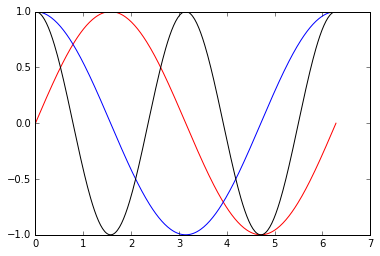

In [196]:
%matplotlib inline
# The previous command is just so the plots display in this Jupyter notebook.

import matplotlib.pyplot as plt

# Create 301 evenly spaced points between 0 and 2pi.
x = np.linspace(0, 2*np.pi, 301)

# Functions to plot.
f1 = np.sin(x)
f2 = np.cos(x)
f3 = np.cos(2*x)

# Plot all functions on the same axes.
# Set axis limits [x_min, x_max, y_min, y_max]
# plt.axes([0,2*np.pi,-1,1])

# Plot the functions in different colors. 'r' = red, 'b' = blue, 'k' = black.
plt.plot(x, f1, 'r', x, f2, 'b', x, f3, 'k');

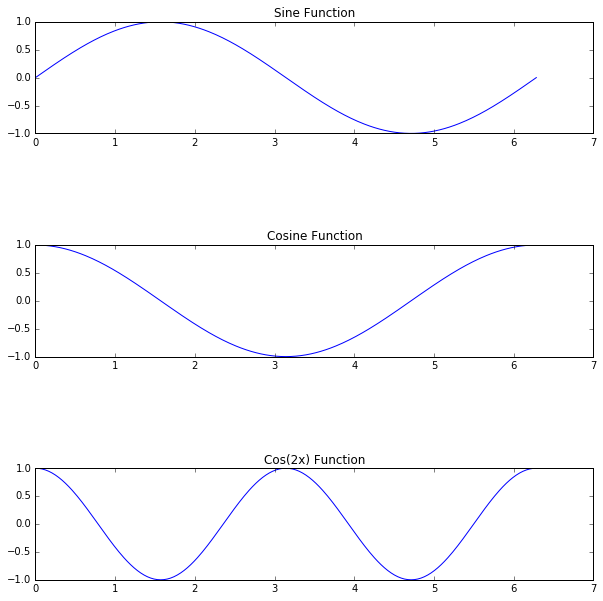

In [198]:
# Set plot options.
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=1, wspace=1)

""" Create 3 subplots. 
    First argument := number of rows in grid
    Second argument := number of columns in grid
    Third argument := position of current subplot (positions are labelled left to right, top to bottom)
    
"""

plt.subplot(3,1,1)
plt.title('Sine Function')
plt.plot(x,f1);

plt.subplot(3,1,2)
plt.title('Cosine Function')
plt.plot(x,f2);

plt.subplot(3,1,3)
plt.title('Cos(2x) Function')
plt.plot(x,f3);

You can also make histograms with MatPlotLib and NumPy.

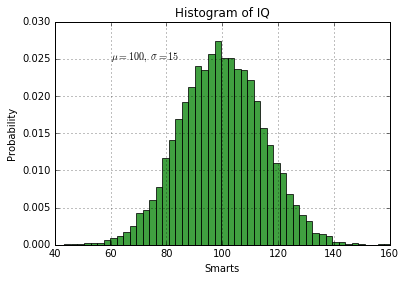

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(X, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show();

## Installing Packages and the Python Packaging Index (PyPI)

As mentioned above, there are thousands of available packages for all kinds of applications. You can find some of the best packages at the [Python Packaging Index](https://pypi.org). These packages can usually be installed from the terminal using the command `pip install <package-name> --user`. The `--user` option is used where you don't have administrative priviledges to install things, such as the Syzygy server.

Here is an example of the output when we try to install NumPy.

In [200]:
!pip install numpy --user

We already knew that we had NumPy installed. Let's try another package.

In [201]:
!pip install TheanoLM --user

## *Exercises*

<ol>
    <li> Write a function that takes in two arguments, a list and a value. Your function should return `True` if the value is in the list and `False` if not. Such functions are often called 'characteristic' or 'indicator' functions. </li>
</ol>

In [221]:
def charFunction(elements, node):
    """ Return True if 'node' is in 'elements', False otherwise. """
    
    # Convert everything to strings to avoid type problems.
    str_elements = [str(value) for value in elements]
    str_node = str(node)
    
    if str_node in str_elements:
        return True
    else:
        return False
    
test_list = ['Jewel','Seal','Monica','Brandy','Madonna','Bono','Everlast']
test_list1 = [True, False, True, True, False]

print(charFunction(test_list1, 'Lions'))

False


<ol start='2'>
    <li> The Christmas Gift Exchange. Write a function or sequence of nested functions that takes in a list of names and randomly assigns Christmas gift giving/receiving pairs. Your function(s) should make sure nobody gets a gift for themselves. </li>
</ol>

In [249]:
# Your code here.
import random

names = ['George','William','Mary','Beatrice','Percival','Commodore','Pearl']

def randomJumble(names):
    """ Randomly mix up the list of names. """
    
    random_names = random.sample(names, len(names))
    
    # Check if any names are repeated and jumble the list again if there are.
    for (p1,p2) in zip(names, random_names):
        if p1 is p2:
            random_names = random.sample(names, len(names))
    
    
    gifts = [(person1, person2) for (person1, person2) in zip(names, random_names)]
    print(gifts)
    
    pass

randomJumble(names)

[('George', 'Pearl'), ('William', 'Beatrice'), ('Mary', 'William'), ('Beatrice', 'Commodore'), ('Percival', 'Mary'), ('Commodore', 'George'), ('Pearl', 'Percival')]


<ol start='3'>
    <li> Modify the 'Restaurant Bill Calculator' code above to allow the customer to specify if they want to apply the tip before or after the GST. You can also add an option for the customer to specify the tip as a percentage or as an amount. </li>
</ol>

In [251]:
def main():
    """ Restaurant Bill Calculator. """
    
    print('Thank you for eating at the Python Cafe.\n')
    
    # Get the before-tax bill.
    bill = float(input('Please input amount: '))
    
    when_to_calc_tip = 'e'
    
    while when_to_calc_tip not in ['y','n']:
        when_to_calc_tip = input('Calculate tip after tax? ')
    
    if when_to_calc_tip is 'y':
        tip_rate = -1

        while tip_rate < 0:
            tip_rate = float(input('Please input tip %: '))

        if tip_rate % 100 is not 0:
            tip_rate /= 100

        total_tax = GST(bill)
        total = tip(total_tax, tip_rate)

        print('\n\nYour GST is ${:.2f}'.format(total_tax - bill))    
        print('Your total today is ${:.2f}.'.format(total))
    else:
        tip_rate = -1

        while tip_rate < 0:
            tip_rate = float(input('Please input tip %: '))

        if tip_rate % 100 is not 0:
            tip_rate /= 100

        tip_amount = tip(bill, tip_rate) - bill
        total_tax = GST(bill)
        
        total = tip_amount + total_tax

        print('\n\nYour GST is ${:.2f}'.format(total_tax))    
        print('Your total today is ${:.2f}.'.format(total))
    
if __name__ == '__main__':
    main()

Thank you for eating at the Python Cafe.

Please input amount: 261.76
Calculate tip after tax? y
Please input tip %: 16


Your GST is $13.09
Your total today is $318.82.


<ol start = '4'>
    <li> Write a program to convert between Fahrenheit and Celsius temperatures. The formula for converting &deg;C to &deg;F is $T_F = T_C\cdot \frac{9}{5} + 32$. The formula to convert &deg;F to &deg;C is $T_F = (T_F - 32)\cdot\frac{5}{9}$. </li>
</ol>

In [253]:
# Your code here.
def convertToCelsius(degreesFahr):
    """ Convert degrees Fahrenheit to Celsius. """
    
    return (degreesFahr - 32)*5/9

def convertToFahrenheit(degreesCel):
    """ Convert degrees Celsius to Fahrenheit. """
    
    return degreesCel*9/5 + 32

# Testing.
print('{} degrees F is {} degrees C.'.format(32,convertToCelsius(32)))
print('{} degrees C is {} degrees F.'.format(32,convertToFahrenheit(32)))

32 degrees F is 0.0 degrees C.
32 degrees C is 89.6 degrees F.


<ol start='5'>
    <li> The 'Scoobify' function doesn't replace commas in a string with commas after replacing `keywords` with 'Scooby'. Define a new function (or functions) that correctly preserve commas in the scoobified sentence. </li>
</ol>

In [ ]:
# Your code here.

### `try` and `except`

You can also use `try` and `except` to throw exceptions.

In [222]:
try:
    # Write the code you want to try.
    import TheanoLM
except:
    # Write what happens if an exception is raised.
    print('You need to read the documentation!')

You need to read the documentation!


In [232]:
def absoluteValue(x):
    """ The absolute value function. """
    
    if type(x) is type('h'):
        raise ValueError('It did not work.')
    
    if x >= 0:
        return x
    elif x < 0:
        return -x
    
print(absoluteValue('word'))

ValueError: It did not work.

In [239]:
try:
    file = open('data.csv')
    F = file.read()
except:
    print('The file does not exist.')

print(F)

4,5,6,7
1,2,3,4
